In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('Mall_Customers.csv')

In [40]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df['Genre'] = df['Genre'].replace(to_replace=['Male',"Female"],value=[1,0])

/var/folders/2t/syh9gx9j08vcd5w3tz6mjzlr0000gn/T/ipykernel_1470/2865467761.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Genre'] = df['Genre'].replace(to_replace=['Male',"Female"],value=[1,0])


In [42]:
df=df.drop('CustomerID',axis=1)

In [43]:
X = df.drop('Genre',axis=1).values


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2,random_state=24)
X = pca.fit_transform(X)

In [47]:
X

array([[-6.15720019e-01, -1.76348088e+00],
       [-1.66579271e+00, -1.82074695e+00],
       [ 3.37861909e-01, -1.67479894e+00],
       [-1.45657325e+00, -1.77242992e+00],
       [-3.84652078e-02, -1.66274012e+00],
       [-1.48168526e+00, -1.73500173e+00],
       [ 1.09461665e+00, -1.56610230e+00],
       [-1.92630736e+00, -1.72111049e+00],
       [ 2.64517786e+00, -1.46084721e+00],
       [-9.70130513e-01, -1.63558108e+00],
       [ 2.49568861e+00, -1.47048914e+00],
       [-1.45688256e+00, -1.66436050e+00],
       [ 2.01018729e+00, -1.45329897e+00],
       [-1.41321072e+00, -1.61776746e+00],
       [ 1.00042965e+00, -1.49579176e+00],
       [-1.56943170e+00, -1.62502669e+00],
       [ 2.94060318e-01, -1.49425585e+00],
       [-1.31624924e+00, -1.57216383e+00],
       [ 1.31669910e+00, -1.37243404e+00],
       [-1.43679899e+00, -1.51039469e+00],
       [ 2.88561175e-01, -1.37988135e+00],
       [-1.26018513e+00, -1.45723906e+00],
       [ 1.66684303e+00, -1.27396755e+00],
       [-9.

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wss = []
for k in range(1,50):
    mean =  KMeans(n_clusters=k,init='k-means++')
    mean.fit(X)
    wss.append(mean.inertia_)
    # print(silhouette_score(X,mean.labels_))
    

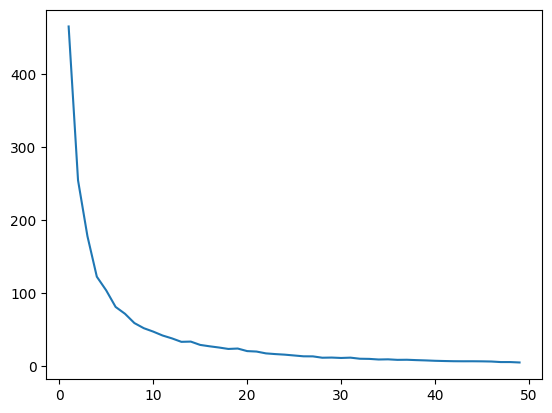

In [49]:
plt.plot(range(1,50),wss)

In [50]:
kmean = KMeans(n_clusters=4,init='k-means++')
kmean.fit(X)



,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [51]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmean.labels_)

0.40104204517288167

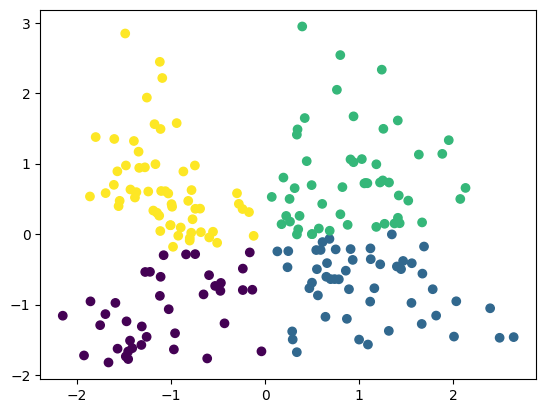

In [52]:
plt.scatter(X[:,0],X[:,1],c=kmean.labels_)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [42.5, 42.5, 80.0, 80.0],
  [12.5, 12.5, 61.25, 61.25],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [172.5, 172.5, 203.75, 203.75],
  [150.0, 150.0, 188.125, 188.125],
  [113.75, 113.75, 169.0625, 169.0625],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [141.40625, 141.40625, 251.25, 251.25],
  [36.875, 36.875, 196.328125, 196.328125],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [375.0, 375.0, 385.0, 385.0]

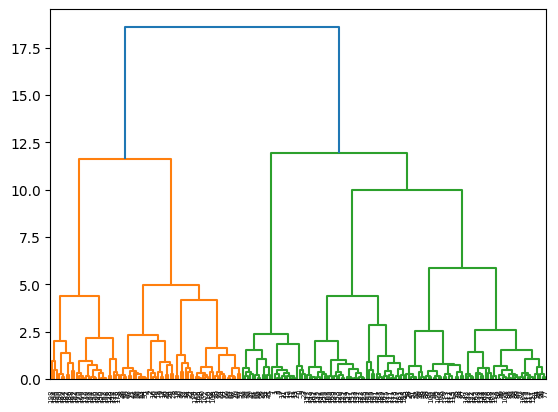

In [53]:
import scipy.cluster.hierarchy as sc
sc.dendrogram(sc.linkage(X,method='ward'))

In [54]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=10,metric='euclidean',linkage='ward')
cluster.fit(X)

,n_clusters,10
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [55]:
silhouette_score(X,cluster.labels_)

0.36728270663879564

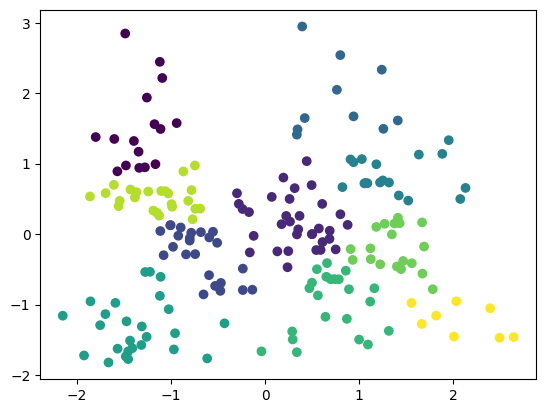

In [56]:
plt.scatter(X[:,0],X[:,1],c=cluster.labels_)

In [82]:
from sklearn.cluster import DBSCAN
for k in range(2,9,1):
    d = DBSCAN(eps=k/10,min_samples=5)
    d.fit(X)
    print(silhouette_score(X,d.labels_))

-0.06200851921858211
0.09190816104608622
0.2173908132787701
0.32031182881756964
0.34801064288932493
0.39114197566450293
0.36108271060717256


In [83]:
dbscan = DBSCAN(eps=0.7,min_samples=5)
dbscan.fit(X)


,eps,0.7
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [84]:
silhouette_score(X,dbscan.labels_)

0.39114197566450293

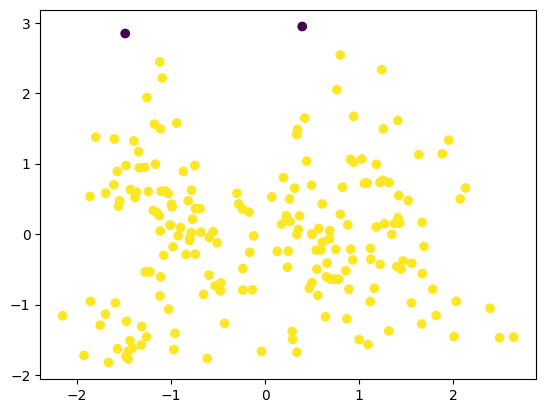

In [85]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)